In [ ]:
#Questão 1
#Já tinha feito pra R^n, funciona para R² também ;-)

class Vector:
    def __init__(self, coords, espaco_vetorial):
        self.coords = [float(c) for c in coords]
        self.espaco_vetorial = espaco_vetorial

    def __str__(self):
        return f"({', '.join(str(c) for c in self.coords)})"
    
    def dimensao(self):
        return len(self.coords)
    
    def __add__(self, outro_vet):

        if self.dimensao() != outro_vet.dimensao():
            return ValueError
        
        nova_coords = [a + b for a, b in zip(self.coords, outro_vet.coords)]
        return Vector(nova_coords, self.espaco_vetorial)
    
    def prod_esc(self, escalar):
        nova_coords = [a * escalar for a in self.coords]
        return Vector(nova_coords, self.espaco_vetorial)
    
    def prod_int(self, outro_vet):
        if self.dimensao() != outro_vet.dimensao():
            return ValueError
        
        return sum(a * b for a, b in zip(self.coords, outro_vet.coords))

    def prod_vet(self, outro_vet):
        if self.dimensao() != outro_vet.dimensao():
            return ValueError
        
        if self.dimensao() == 3:
            x1, y1, z1 = self.coords
            x2, y2, z2 = outro_vet.coords
            return Vector([y1 * z2 - z1 * y2, z1 * x2 - x1 * z2, x1 * y2 - y1 * x2], self.espaco_vetorial)
        else:
            raise NotImplementedError("Produto vetorial só está implementado para vetores em R^3")
    
    def __abs__(self):
        return sum(c ** 2 for c in self.coords) ** 0.5
    
    def __sub__(self, u):
        return Vector([a - b for a, b in zip(self.coords, u.coords)], self.espaco_vetorial)

    def __mul__(self, x):
        if isinstance(x, (float, int)):
            return self.prod_esc(x)
        elif isinstance(x, Vector):
            return self.prod_int(x)
        else:
            raise TypeError("Multiplicação não suportada para esse tipo.")

    def __neg__(self):
        return Vector([-c for c in self.coords], self.espaco_vetorial)

class EspacoVetorial:
    def __init__(self, corpo=float, dimensao = 3):
        self.dimensao = dimensao

    def __str__(self):
        return f"Espaço Vetorial: R^{self.dimensao}"

    def pertence_ao_espaco(self, vet):
        if vet.dimensao() == self.dimensao:
            return True
        else: 
            return False
        
    def verificar_independencia_linear(self, lista_de_vets): #feito por IA
        """
        Verifica se uma lista de vetores é linearmente independente (LI) usando
        o método de Eliminação Gaussiana.

        Args:
            lista_de_vetores (list[Vetor]): Uma lista de objetos Vetor.

        Returns:
            bool: True se os vetores são LI, False se são linearmente dependentes (LD).
        """
        # Define uma pequena tolerância para comparações com zero,
        # essencial para a estabilidade de algoritmos com ponto flutuante.
        EPSILON = 1e-10

        # 'n' é a dimensão do espaço vetorial.
        n = self.dimensao
        # 'k' é o número de vetores a serem verificados.
        k = len(lista_de_vets)

        # Validação: Garante que todos os vetores pertencem ao espaço.
        for v in lista_de_vets:
            if not self.pertence_ao_espaco(v):
                raise ValueError(f"O vetor {v} não pertence ao espaço R^{n}")

        # Caso trivial: Se há mais vetores do que a dimensão do espaço,
        # eles são, por definição, linearmente dependentes.
        if k > n:
            return False

        # Cria uma matriz n x k onde cada COLUNA é um dos vetores.
        # Fazemos uma cópia para não alterar os objetos Vetor originais.
        matriz = [list(vetor.coords) for vetor in lista_de_vets]
        matriz_transposta = [[matriz[j][i] for j in range(k)] for i in range(n)]
        
        # A partir daqui, trabalhamos com a matriz transposta (n linhas, k colunas).
        matriz = matriz_transposta

        # linha_pivo rastreia a linha que estamos usando para eliminar as outras.
        linha_pivo = 0
        # Itera sobre as colunas para encontrar um pivô em cada uma.
        for coluna in range(k):
            if linha_pivo >= n:
                break # Todas as linhas disponíveis já foram usadas como pivô.

            # Encontra uma linha com um elemento não-nulo (pivô) na coluna atual.
            i = linha_pivo
            while i < n and abs(matriz[i][coluna]) < EPSILON:
                i += 1

            if i < n: # Pivô encontrado na linha 'i'
                # Move a linha do pivô para a posição de pivô atual.
                matriz[linha_pivo], matriz[i] = matriz[i], matriz[linha_pivo]

                # Normaliza a linha do pivô (divide pelo valor do pivô) para que o pivô seja 1.
                # Este passo é opcional mas simplifica o cálculo do fator.
                pivo = matriz[linha_pivo][coluna]
                for j in range(coluna, k):
                    matriz[linha_pivo][j] /= pivo

                # Zera todos os outros elementos na coluna do pivô.
                # (Para escalonamento, basta zerar os elementos ABAIXO do pivô).
                for j in range(linha_pivo + 1, n):
                    fator = matriz[j][coluna]
                    # Subtrai a linha do pivô (multiplicada pelo fator) da linha atual.
                    for l in range(coluna, k):
                        matriz[j][l] -= fator * matriz[linha_pivo][l]

                # Move para a próxima linha de pivô.
                linha_pivo += 1

        # O número de pivôs encontrados é igual ao posto da matriz.
        # Se o posto é igual ao número de vetores (k), os vetores são LI.
        return linha_pivo == k

vetores = [[1.0, 2.0, 3.0], [0.0, 1.0, 4.0], [2.0, 0.0, 1.0]]
dim = len(vetores[0])
for i, vetor in enumerate(vetores):
    espaco = EspacoVetorial(None, dim)
    vet = Vector(vetor, espaco)
    vetores[i] = vet

for v in vetores:
    print(v, end='')
print()

V3 = EspacoVetorial(None, 3)

print('Vetores são LI' if V3.verificar_independencia_linear(vetores) else 'Vetores são LD')

print(vetores[0])
print(-vetores[0])
print(vetores[0] + vetores[1])
print(vetores[0] - vetores[1])
print(vetores[0] * 3)
print(vetores[0] * vetores[1])
print(vetores[0].espaco_vetorial)
print(abs(vetores[0]))


In [ ]:
#Questão 2

'''
Refazendo o Código para aplicar melhor as subclasses.
Vetor em R^n será subclasse de Espaco_vetorial.
'''

class Espaco_vetorial:
    def __init__(self, dimensao=3):
        self.dimensao = dimensao

    def __str__(self):
        return f"Espaço Vetorial: R^{self.dimensao}"

    def pertence_ao_espaco(self, vet):
        if vet.dimensao() <= self.dimensao:
            return True
        else: 
            return False

class Vector():
    def __init__(self, coordenadas):
        self.coords = coordenadas
        self.dimensao = len(coordenadas)
        self.espaco = Espaco_vetorial(self.dimensao)
    
    def espace(self):
        #relacionar com a classe Espaco_vetorial
        return self.espaco

    def __str__(self):
        if isinstance(self, Polynomial):
            return self.espaco.__str__() + f", Polinômio: {self.expressao}, Coeficientes: {self.coords}"
        return self.espaco.__str__() + f", Vetor: {self.coords}"

    def __add__(self, outro):
        return Vector([self.coords[i] + outro.coords[i] for i in range(len(self.coords))])

    def __sub__(self, outro):
        return Vector([self.coords[i] - outro.coords[i] for i in range(len(self.coords))])

    def __neg__(self):
        return Vector([-c for c in self.coords])
    
    def __repr__(self):
        return f"Vector({self.coords})"

    def __rmul__(self, outro):
        #chamando __mul__ para garantir a comutatividade
        return self.__mul__(outro)
    
    def __abs__(self):
        return f"Norma: {sum(c ** 2 for c in self.coords) ** 0.5}"

    def __mul__ (self, outro):
        if isinstance(outro, (int, float)):
            return Vector([c * outro for c in self.coords])
        elif isinstance(outro, Vector):
            return sum([self.coords[i] * outro.coords[i] for i in range(len(self.coords))])
        raise TypeError("Operação não suportada")

    def hadamard(self, outro):
        if not isinstance(outro, Vector):
            raise TypeError("Operação não suportada")
        if self.dimensao != outro.dimensao:
            raise ValueError("Dimensões incompatíveis")
        return Vector([self.coords[i] * outro.coords[i] for i in range(len(self.coords))])

    def prod_vet(self, outro):
        if not isinstance(outro, Vector):
            raise TypeError("Operação não suportada")
        if self.dimensao != outro.dimensao:
            raise ValueError("Dimensões incompatíveis")
        #Calcula produto vetorial até R^3
        if self.dimensao == 3 and outro.dimensao == 3:
            return Vector([
                self.coords[1] * outro.coords[2] - self.coords[2] * outro.coords[1],
                self.coords[2] * outro.coords[0] - self.coords[0] * outro.coords[2],
                self.coords[0] * outro.coords[1] - self.coords[1] * outro.coords[0]
            ])
        raise ValueError("Produto vetorial só é definido em R^3")

class Vector3D(Vector):
    def __init__(self, coordenadas):
        if len(coordenadas) != 3:
            raise ValueError('Vetor não é de 3 dimensões')
        super().__init__(coordenadas)


class Polynomial(Vector):
    def __init__(self, expressao):
        self.expressao = expressao
        #ex: 2x^2 + 3x + 1
        termos = expressao.split(' + ')
        coef = []
        for termo in termos:
            temp = termo.split('x')
            coef.append(float(temp[0]))
        super().__init__(coef)

    def __str__(self):
        return super().__str__()
    


vet = Vector([1.0, 2.0, 4.0])
print(vet)
poly = Polynomial('2x^2 + 3x + 1')
print(poly)
mini = Vector([3.0, 4.0])
mini2 = Vector([5.0, 6.0])
print(poly + vet)
print(poly - vet)
print(poly * vet)
print(poly * 4)
print(mini * mini2)
print(mini.hadamard(mini2))
print(vet.prod_vet(poly))
print(abs(mini))

Questão 3 no .png em anexo

![Screenshot from 2025-08-25 20-09-02.png](<attachment:Screenshot from 2025-08-25 20-09-02.png>)
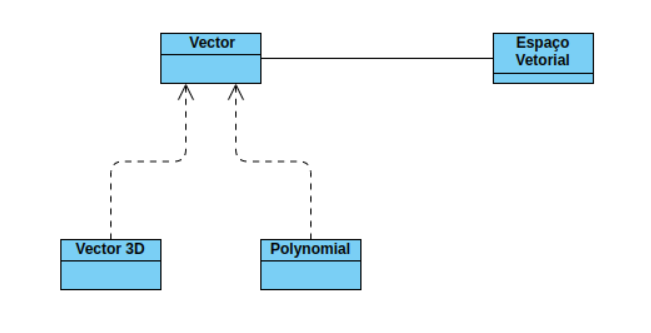

In [ ]:
#Questão 4

class Pilha:
    def __init__(self):
        self.index = dict()
        self.itens = []

    def push(self, item):
        i = len(self.itens)
        self.index[item] = i
        self.itens.append(item)

    def pop(self, rand=False):
        if self.itens:
            if rand:
                import random
                idx = random.randint(0, len(self.itens) - 1)
                removido = self.itens[idx]
                final = self.itens[-1]
                self.itens[idx], self.itens[-1] = self.itens[-1], self.itens[idx]
                self.index[final] = idx
                del self.index[removido]
            else:
                del self.index[self.itens[-1]]
            return self.itens.pop()
        return "Pilha vazia"

 
    def top(self):
        if self.itens:
            return self.itens[-1]
        return "Pilha vazia"
    
p = Pilha()
print("1.", p.pop())            
p.push(100)
p.push(200)
p.push(300)
print("2.", p.top())            
print("3.", p.pop(rand=True))   
print("4.", p.itens)            
p.push(400)
p.push(500)
print("5.", p.pop(rand=True))   
print("6.", p.pop())            
print("7.", p.pop())   
print("8.", p.pop())


1. Pilha vazia
2. 300
3. 300
4. [100, 200]
5. 100
6. 400
7. 200
8. 500


In [ ]:
#Questão 5

import collections
import random

# Define uma tupla nomeada chamada Carta
# com os campos 'valor' e 'naipe'
Carta = collections.namedtuple('Carta', ['valor', 'naipe'])

class BaralhoFrances:
    """
    Representa um baralho padrão francês com 52 cartas.
    Cada carta possui um valor (2-10, J, Q, K, A) e
    um naipe (espadas, ouros, paus, copas).
    """
    # Valores possíveis das cartas
    valores = [str(n) for n in range(2, 11)] + list('JQKA')
    # Naipes possíveis
    naipes = 'espadas ouros paus copas'.split()

    def __str__(self):
        return "Baralho de 52 cartas"

    def __init__(self):
        """
        Inicializa o baralho com todas as combinações
        de valores e naipes.
        """
        # Lista para armazenar as cartas do baralho
        self._cartas = []
        # Cria as cartas combinando valores e naipes
        for naipe in self.naipes:
            for valor in self.valores:
                # Adiciona cada carta ao baralho
                self._cartas.append(Carta(valor, naipe))
    
    def __len__(self):
        """Retorna o número de cartas no baralho."""
        return len(self._cartas)
    
    def __getitem__(self, posicao):
        """Permite acessar uma carta pela posição (indexação)."""
        return self._cartas[posicao]
    
    def __setitem__(self, posicao, valor):
        self._cartas[posicao] = valor

# Exemplo de uso
meu_baralho = BaralhoFrances()
print(meu_baralho)
print(meu_baralho[1]) # Imprime a segunda carta do baralho
random.shuffle(meu_baralho) # Embaralha o baralho
print(meu_baralho[1]) # Imprime a segunda carta do baralho após embaralhamento

Explicação questão 5

Comando random.shuffle não consegue acessar a lista das cartas diretamente. Por isso, deve-se adicionar o metodo magico setitem para tornar a classe compatível com o comando shuffle().